# Разложение Холецкого

Выполнил студент 3 курса долбвеб

In [193]:
import numpy as np
import pandas as pd

#===========================================
A1 = np.array([
    [81, -45, 45],
    [-45, 50, -15],
    [45, -15, 38]
])

b1 = np.array([
    [531],
    [-460],
    [193]
])

x1 = np.array([[6], [-5], [-4]])

#===========================================
A2 = np.array([
    [6.25, -1, 0.5],
    [-1, 5, 2.12],
    [0.5, 2.12, 3.6]
])

b2 = np.array([
    [7.5],
    [-8.68],
    [-0.24]
])

x2 = np.array([[0.8], [-2], [1]])

#===========================================
A3 = np.array([
    [1, 3, -2, 0, -2],
    [3, 4, -5, 1, -3],
    [-2, -5, 3, -2, 2],
    [0, 1, -2, 5, 3],
    [-2, -3, 2, 3, 4]
])

b3 = np.array([
    [0.5],
    [5.4],
    [5.0],
    [7.5],
    [3.3]
])

x3 = np.array([[-6.0978], [-2.2016], [-6.8011], [-8.8996], [0.1998]])

#===========================================
A4 = np.array([
    [1, 2, 4],
    [2, 13, 23],
    [4, 23, 77]
])

b4 = np.array([
    [10],
    [50],
    [150]
])

x4 = np.array([[2.22], [0.55], [1.67]])

In [194]:
def CholeskyDecomp(M):
    n = len(M)
    U = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            Sum = 0

            if (i == j):
                for k in range(i):
                    Sum += U[k, i]*U[k, i]
                
                U[i, i] = (M[i, i] - Sum)**.5

            elif (i < j):
                for k in range(i):
                    Sum += U[k, i]*U[k, j]

                U[i, j] = (M[i, j] - Sum) / U[i, i]

    return U

### Тест1

Разложение Холецкого имеет ограничение на определенность матрицы, потому в начале каждого теста я буду проверять матрицу на положительную определенность, используя собственные значения заданной матрицы

In [195]:
eigenvalues, eigenvectors = np.linalg.eig(A1)
eigenvalues

array([134.72475295,   4.55103023,  29.72421681])

In [196]:
Ch = CholeskyDecomp(A1)

A1, Ch.T @ Ch

(array([[ 81, -45,  45],
        [-45,  50, -15],
        [ 45, -15,  38]]),
 array([[ 81., -45.,  45.],
        [-45.,  50., -15.],
        [ 45., -15.,  38.]]))

In [197]:
y = np.linalg.inv(Ch.T) @ b1
x = np.linalg.inv(Ch) @ y

x - x1

array([[-8.8817842e-16],
       [ 8.8817842e-16],
       [ 8.8817842e-16]])

### Тест2

In [198]:
eigenvalues, eigenvectors = np.linalg.eig(A2)
eigenvalues

array([1.8416909, 5.9984759, 7.0098332])

In [199]:
Ch = CholeskyDecomp(A2)

A2, Ch.T @ Ch

(array([[ 6.25, -1.  ,  0.5 ],
        [-1.  ,  5.  ,  2.12],
        [ 0.5 ,  2.12,  3.6 ]]),
 array([[ 6.25, -1.  ,  0.5 ],
        [-1.  ,  5.  ,  2.12],
        [ 0.5 ,  2.12,  3.6 ]]))

In [200]:
y = np.linalg.inv(Ch.T) @ b2
x = np.linalg.inv(Ch) @ y

x - x2

array([[ 0.00000000e+00],
       [ 2.22044605e-16],
       [-3.33066907e-16]])

### Тест3

In [201]:
eigenvalues, eigenvectors = np.linalg.eig(A3)
eigenvalues

array([12.0366661 ,  7.52864994, -1.76261066, -0.33376999, -0.46893539])

Матрица не является положительно определенной, следовательно для неё разложение Холецкого не существует

### Тест4

In [202]:
eigenvalues, eigenvectors = np.linalg.eig(A4)
eigenvalues

array([84.64176666,  0.67334625,  5.68488709])

In [203]:
Ch = CholeskyDecomp(A4)

A4, Ch.T @ Ch

(array([[ 1,  2,  4],
        [ 2, 13, 23],
        [ 4, 23, 77]]),
 array([[ 1.,  2.,  4.],
        [ 2., 13., 23.],
        [ 4., 23., 77.]]))

In [204]:
y = np.linalg.inv(Ch.T) @ b4
x = np.linalg.inv(Ch) @ y

x, x4

(array([[2.22222222],
        [0.55555556],
        [1.66666667]]),
 array([[2.22],
        [0.55],
        [1.67]]))

### Пункт 5 лабы

In [205]:
M1 = np.array([
    [5.8, 0.3, -0.2],
    [0.3, 4, -0.7],
    [-0.2, -0.7, 6.7]
])

v1 = np.array([
    [3.1],
    [-1.7],
    [1.1]
])

eigenvalues, eigenvectors = np.linalg.eig(M1)
print(eigenvalues)

Ch = CholeskyDecomp(M1)

y = np.linalg.inv(Ch.T) @ v1
x = np.linalg.inv(Ch) @ y

x, '', M1 @ x - v1

[6.9338703  5.76694084 3.79918886]


(array([[ 0.56206926],
        [-0.44359823],
        [ 0.13461121]]),
 '',
 array([[ 0.00000000e+00],
        [-2.22044605e-16],
        [-2.22044605e-16]]))

In [206]:
M2 = np.array([
    [4.12, 0.42, 1.34, 0.88],
    [0.42, 3.95, 1.87, 0.43],
    [1.34, 1.87, 3.2, 0.31],
    [0.88, 0.43, 0.31, 5.17]
])

v2 = np.array([
    [11.17],
    [0.115],
    [9.909],
    [9.349]
])

eigenvalues, eigenvectors = np.linalg.eig(M2)
print(eigenvalues)

Ch = CholeskyDecomp(M2)

y = np.linalg.inv(Ch.T) @ v2
x = np.linalg.inv(Ch) @ y

x, '', M2 @ x - v2


[1.39826937 6.73593419 3.53108391 4.77471254]


(array([[ 1.45653917],
        [-1.93309996],
        [ 3.46970779],
        [ 1.51312749]]),
 '',
 array([[ 1.77635684e-15],
        [ 1.98452366e-15],
        [-1.77635684e-15],
        [ 0.00000000e+00]]))

In [207]:
UberMatrixRaw = np.random.rand(1000, 1000)
UberMatrix = UberMatrixRaw.T @ UberMatrixRaw

In [208]:
Ch = CholeskyDecomp(UberMatrix)

### Какие-то выводы мб

Разложение Холецкого довольно бодренько находит компоненты матрицы (т.к работы вдвое меньше, кто бы мог подумать), причем точность так же не уступает своему собрату LU. Ниже я прикрепил скрин, сколько времени выполнялся на рандомной симметричной матрице размерности 1000. Я это сделал чисто по приколу

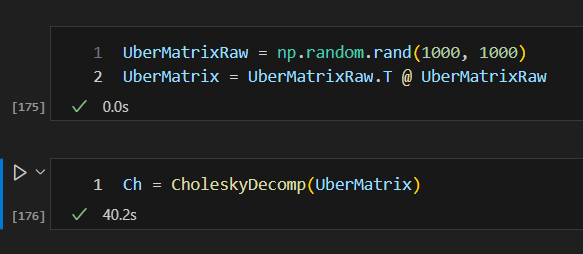